In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/data/data-49159-2023-03-17.csv", delimiter=';', encoding='windows-1251')
df.head()

,ID,Period,global_id,StationName,SurveillanceZoneCharacteristics,AdmArea,District,Location,Parameter,MonthlyAverage,...,Period_en,StationName_en,SurveillanceZoneCharacteristics_en,AdmArea_en,District_en,Location_en,Parameter_en,MonthlyAverage_en,MonthlyAveragePDKss_en,Unnamed: 21
0,Код,Период измерения,global_id,Название станции,Характеристика зоны наблюдения,Административный округ,Район,Адресный ориентир,Измеряемый параметр,Среднее значение в абсолютных единицах,...,Period_en,StationName_en,SurveillanceZoneCharacteristics_en,AdmArea_en,District_en,Location_en,Parameter_en,MonthlyAverage_en,MonthlyAveragePDKss_en,NaN
1,1,02.2016,272777248,Лосиный остров,Природные территории,Восточный административный округ,район Метрогородок,"улица Ротерта, дом 4, строение 5",Оксид углерода,0.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,02.2016,272777249,Глебовская,Смешанные антропогенные источники загрязнений,Восточный административный округ,район Богородское,"Глебовская улица, дом 3, корпус 1",Оксид углерода,0.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,02.2016,272777250,Глебовская,Смешанные антропогенные источники загрязнений,Восточный административный округ,район Богородское,"Глебовская улица, дом 3, корпус 1",Сероводород,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,02.2016,272777251,Глебовская,Смешанные антропогенные источники загрязнений,Восточный административный округ,район Богородское,"Глебовская улица, дом 3, корпус 1",Оксид азота,0.014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
len(df['District'].unique())

45

<Axes: >

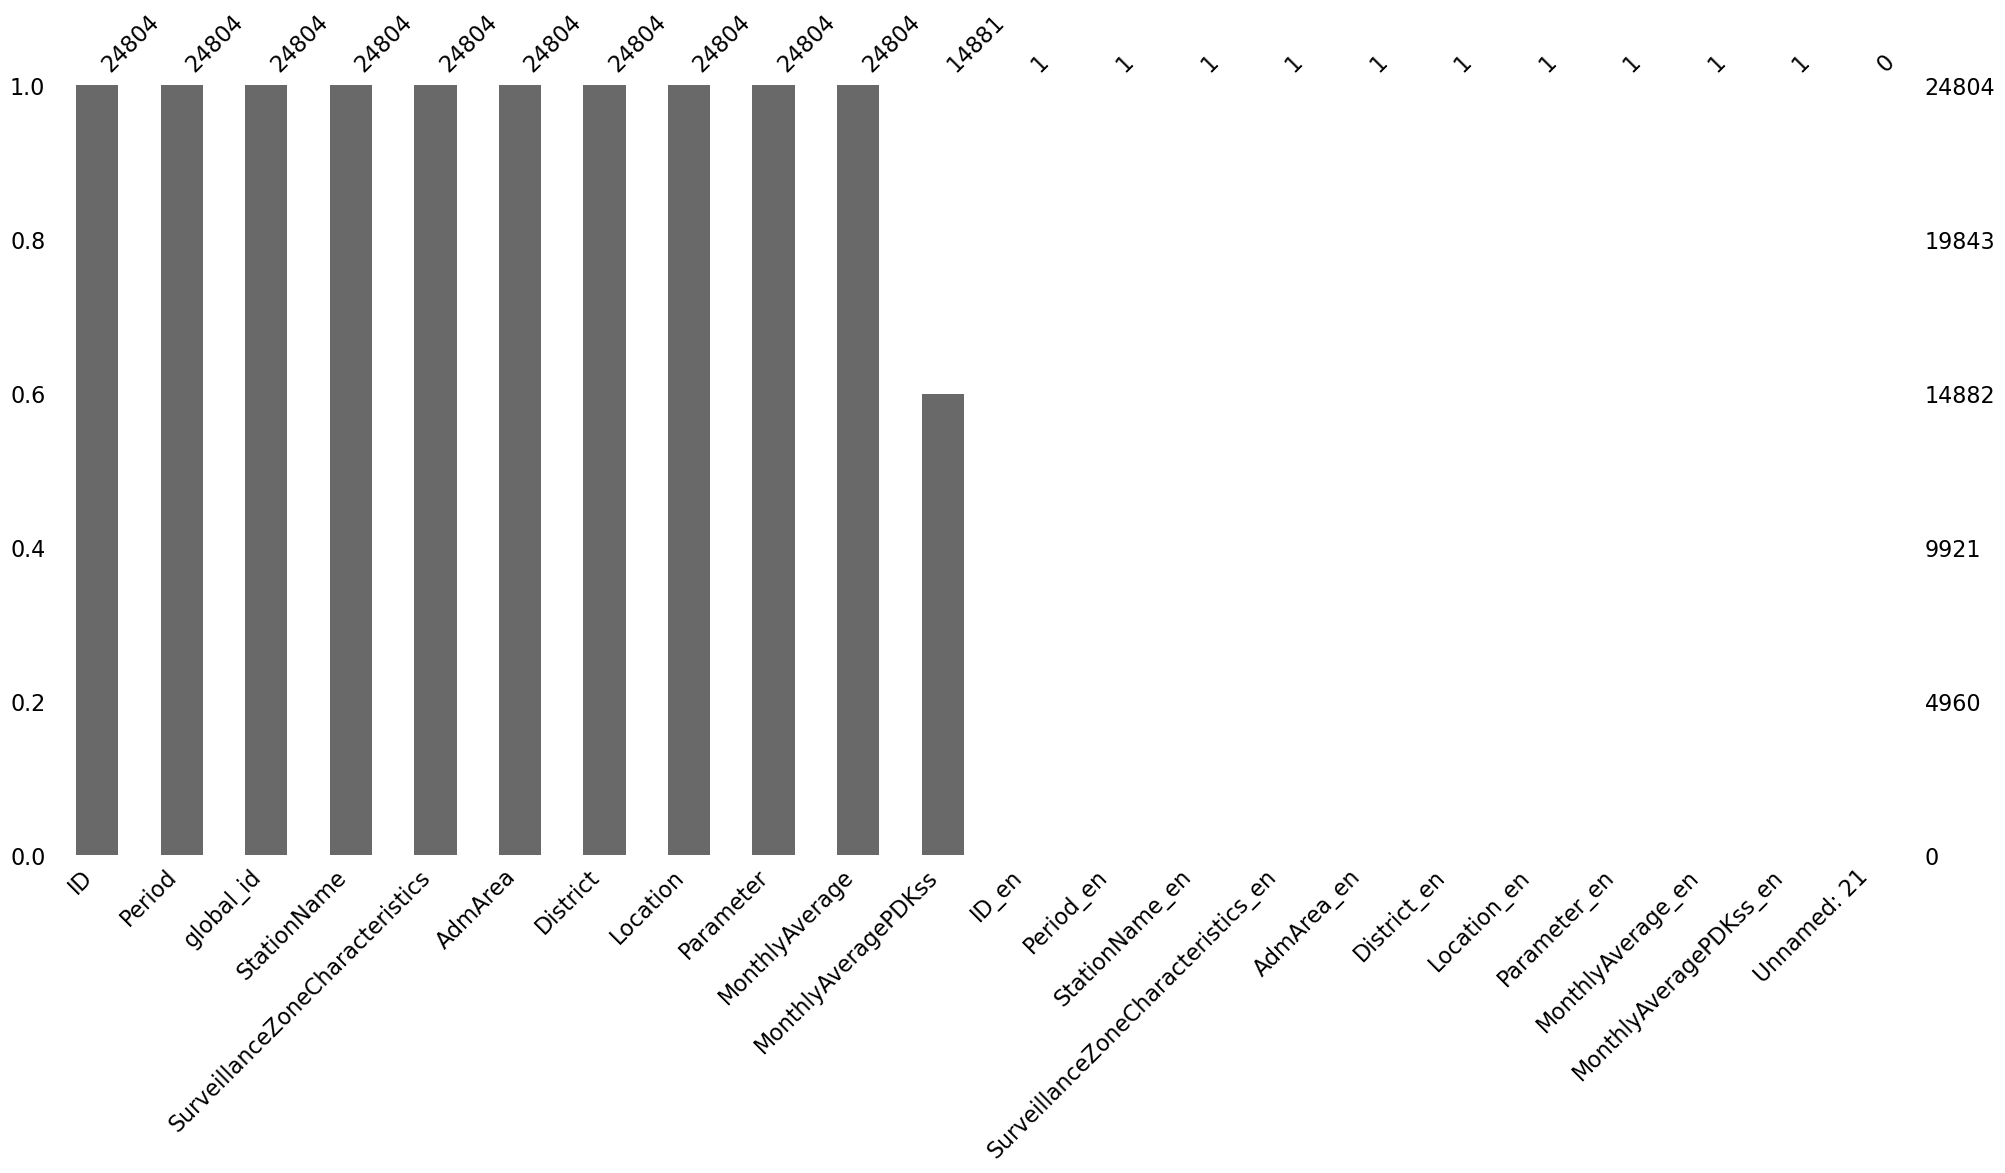

In [4]:
import missingno as msno

msno.bar(df)

In [5]:
df.dtypes

ID                                     object
Period                                 object
global_id                              object
StationName                            object
SurveillanceZoneCharacteristics        object
AdmArea                                object
District                               object
Location                               object
Parameter                              object
MonthlyAverage                         object
MonthlyAveragePDKss                    object
ID_en                                  object
Period_en                              object
StationName_en                         object
SurveillanceZoneCharacteristics_en     object
AdmArea_en                             object
District_en                            object
Location_en                            object
Parameter_en                           object
MonthlyAverage_en                      object
MonthlyAveragePDKss_en                 object
Unnamed: 21                       

In [4]:
df = df.drop(axis=0, index=0)
df = df.astype({'MonthlyAverage': np.float64, 'MonthlyAveragePDKss': np.float64})

In [7]:
ts_df = df[df['Parameter']=='Оксид углерода'][df.District == 'район Новокосино'][['Period', 'MonthlyAverage']]

C:\Users\Арсений\AppData\Local\Temp\ipykernel_12172\1673614157.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ts_df = df[df['Parameter']=='Оксид углерода'][df.District == 'район Новокосино'][['Period', 'MonthlyAverage']]


In [8]:
ts_df['Period'] = pd.to_datetime(ts_df['Period'], format='%m.%Y')

In [9]:
ts_df.to_csv('C:/data/data_time_series.csv', sep=';', encoding='cp1251') 

2023-04-28 22:09:01,829 - CSV data extraction - Used the column as index: "Unnamed: 0".
2023-04-28 22:09:02,036 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 0.3 MiB, max: 0.3 MiB
2023-04-28 22:09:02,046 - ApiComposer - Initial pipeline was fitted in 0.1 sec.
2023-04-28 22:09:02,048 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-04-28 22:09:02,063 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 5.0 min. Set of candidate models: ['arima', 'locf', 'lagged', 'gaussian_filter', 'ets', 'polyfit', 'sparse_lagged', 'diff_filter', 'cut', 'ar', 'glm', 'smoothing', 'stl_arima', 'ts_naive_average', 'arima', 'lagged', 'poly_features', 'sparse_lagged', 'cut', 'glm', 'lgbmreg', 'cgru', 'normalization', 'ridge', 'gaussian_filter', 'dtreg', 'linear', 'svr', 'ar', 'stl_arima', 'rfr', 'locf', 'sgdr', 'ets', 'polyfit', 'pca', 'scaling', 'fast_ica', 'treg', 'exog_t

Generations:   0%|                                                                          | 1/10000 [00:00<?, ?gen/s]

2023-04-28 22:09:02,335 - MultiprocessingDispatcher - 1 individuals out of 1 in previous population were evaluated successfully.
2023-04-28 22:09:08,367 - MultiprocessingDispatcher - 19 individuals out of 21 in previous population were evaluated successfully.
2023-04-28 22:09:12,044 - MultiprocessingDispatcher - 18 individuals out of 18 in previous population were evaluated successfully.
2023-04-28 22:09:15,570 - MultiprocessingDispatcher - 18 individuals out of 18 in previous population were evaluated successfully.
2023-04-28 22:09:21,547 - MultiprocessingDispatcher - 32 individuals out of 32 in previous population were evaluated successfully.
2023-04-28 22:09:27,737 - MultiprocessingDispatcher - 34 individuals out of 34 in previous population were evaluated successfully.
2023-04-28 22:09:33,452 - MultiprocessingDispatcher - 32 individuals out of 32 in previous population were evaluated successfully.
2023-04-28 22:09:39,420 - MultiprocessingDispatcher - 32 individuals out of 32 in pre

Generations:   0%|                                                                          | 1/10000 [03:00<?, ?gen/s]

2023-04-28 22:12:02,366 - ApiComposer - Hyperparameters tuning started with 2 min. timeout


2023-04-28 22:12:02,652 - SimultaneousTuner - Initial graph: {'depth': 5, 'length': 6, 'nodes': [svr, linear, linear, ridge, sparse_lagged, sparse_lagged]}
svr - {}
linear - {}
linear - {}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False} 
Initial metric: 0.043
  0%|                                      | 198/100000 [01:55<17:05:45,  1.62trial/s, best loss: 0.054788411996486215]
2023-04-28 22:14:02,097 - SimultaneousTuner - Final graph: {'depth': 5, 'length': 6, 'nodes': [svr, linear, linear, ridge, sparse_lagged, sparse_lagged]}
svr - {}
linear - {}
linear - {}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False}
2023-04-28 22:14:02,097 - SimultaneousTuner - Final met

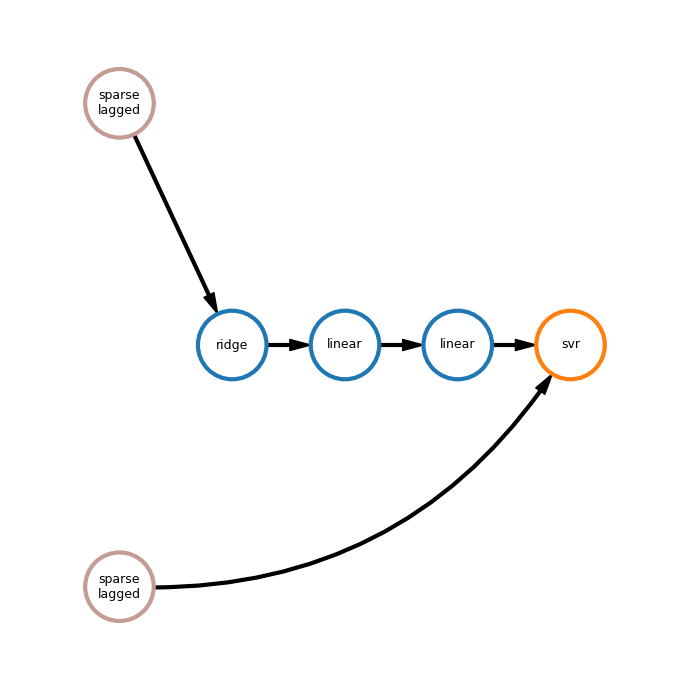

{'rmse': 0.097, 'mae': 0.068, 'mape': 0.352}


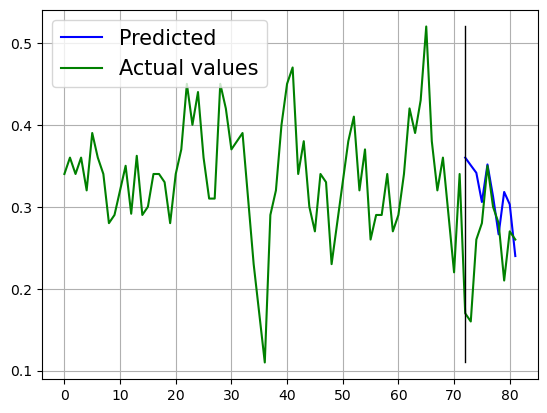

In [33]:
from fedot.api.main import Fedot
from fedot.core.data.data import InputData
from fedot.core.data.data_split import train_test_data_setup
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

task = Task(TaskTypesEnum.ts_forecasting,
            TsForecastingParams(forecast_length=10))

# load data
train_input = InputData.from_csv_time_series(task=task,
                                             file_path='C:/data/data_time_series.csv',
                                             delimiter=';',
                                             target_column='MonthlyAverage')
# split
train_data, test_data = train_test_data_setup(train_input)

# init model 4 ts forecasting
model = Fedot(problem='ts_forecasting', task_params=task.task_params)

pipeline = model.fit(train_data)
pipeline.show()

forecast = model.forecast(test_data)
print(model.get_metrics(metric_names=['rmse', 'mae', 'mape'], target=test_data.target))

model.plot_prediction()

In [154]:
df = df[['Period', 'StationName','Parameter','MonthlyAverage']]
df = df.dropna()

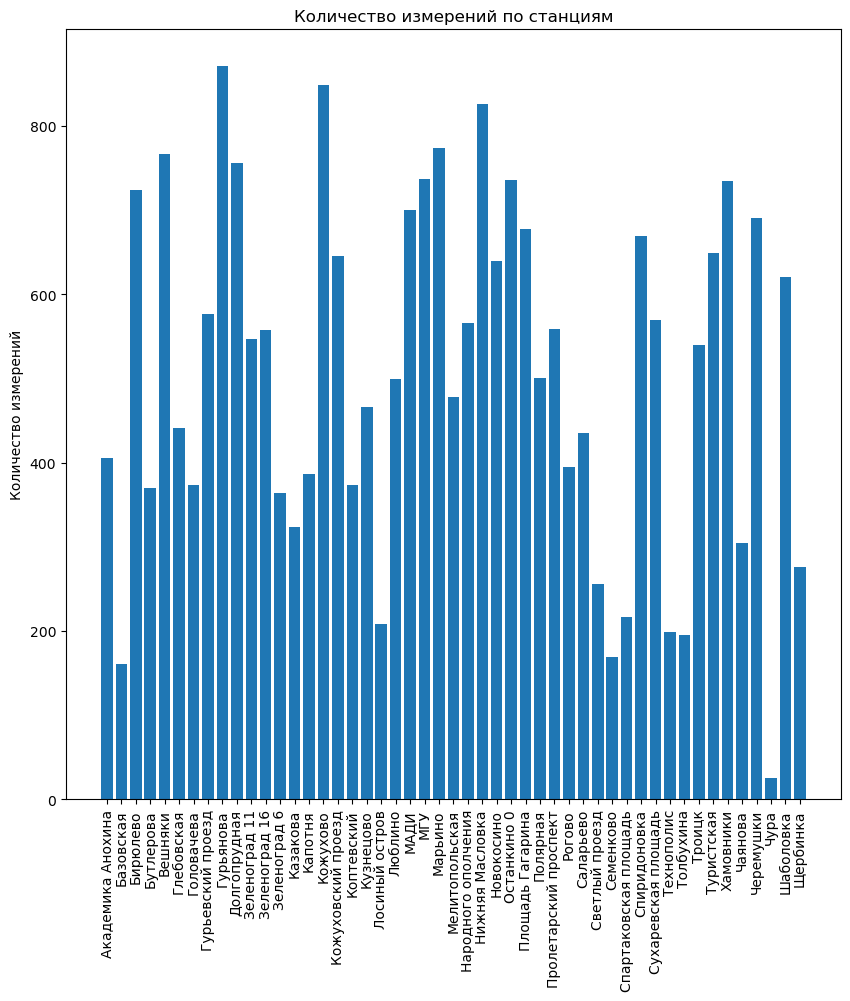

In [174]:
district = df.groupby('StationName').size()

plt.figure(figsize=(10,10))
plt.bar(district.index, district.values)
plt.xticks(rotation = 90)
plt.ylabel('Количество измерений')
plt.title('Количество измерений по станциям')
plt.show()

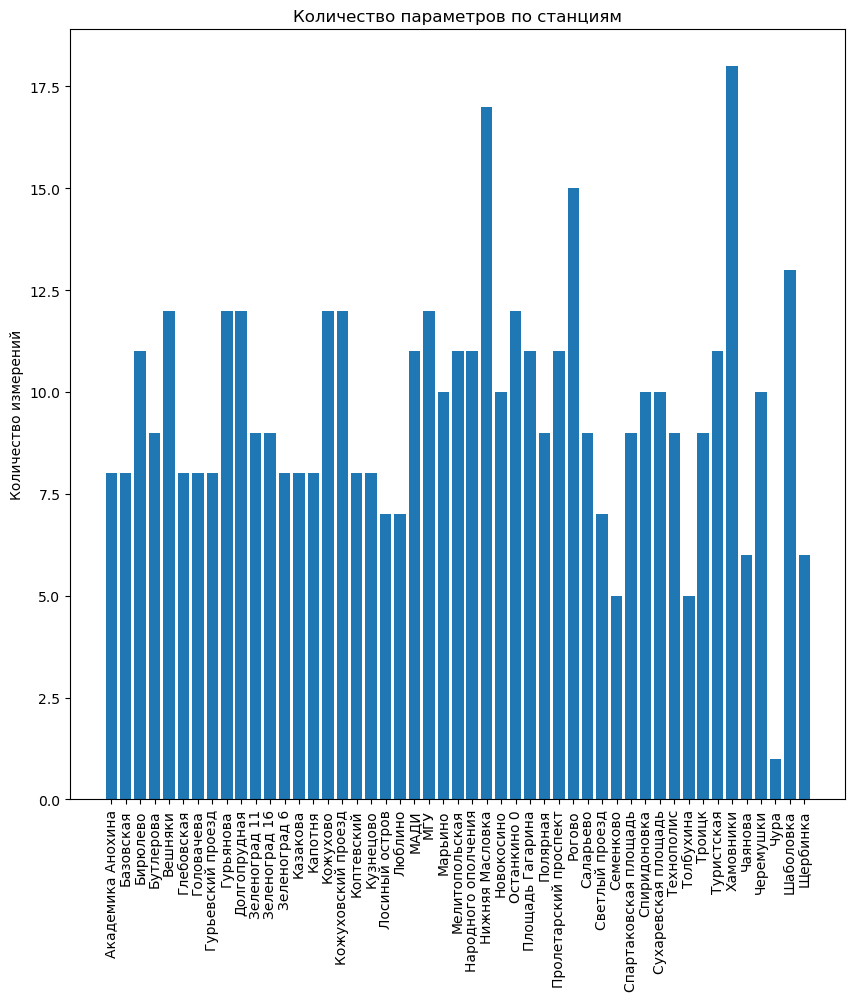

In [175]:
district_param = df.groupby('StationName').agg({'Parameter': lambda x: x.nunique()}).reset_index()

plt.figure(figsize=(10,10))
plt.bar(district_param['StationName'], district_param['Parameter'])
plt.xticks(rotation = 90)
plt.ylabel('Количество измерений')
plt.title('Количество параметров по станциям')
plt.show()

In [41]:
print("Количество измеряемых параметров: ", len(df['Parameter'].unique()))

Количество измеряемых параметров:  22


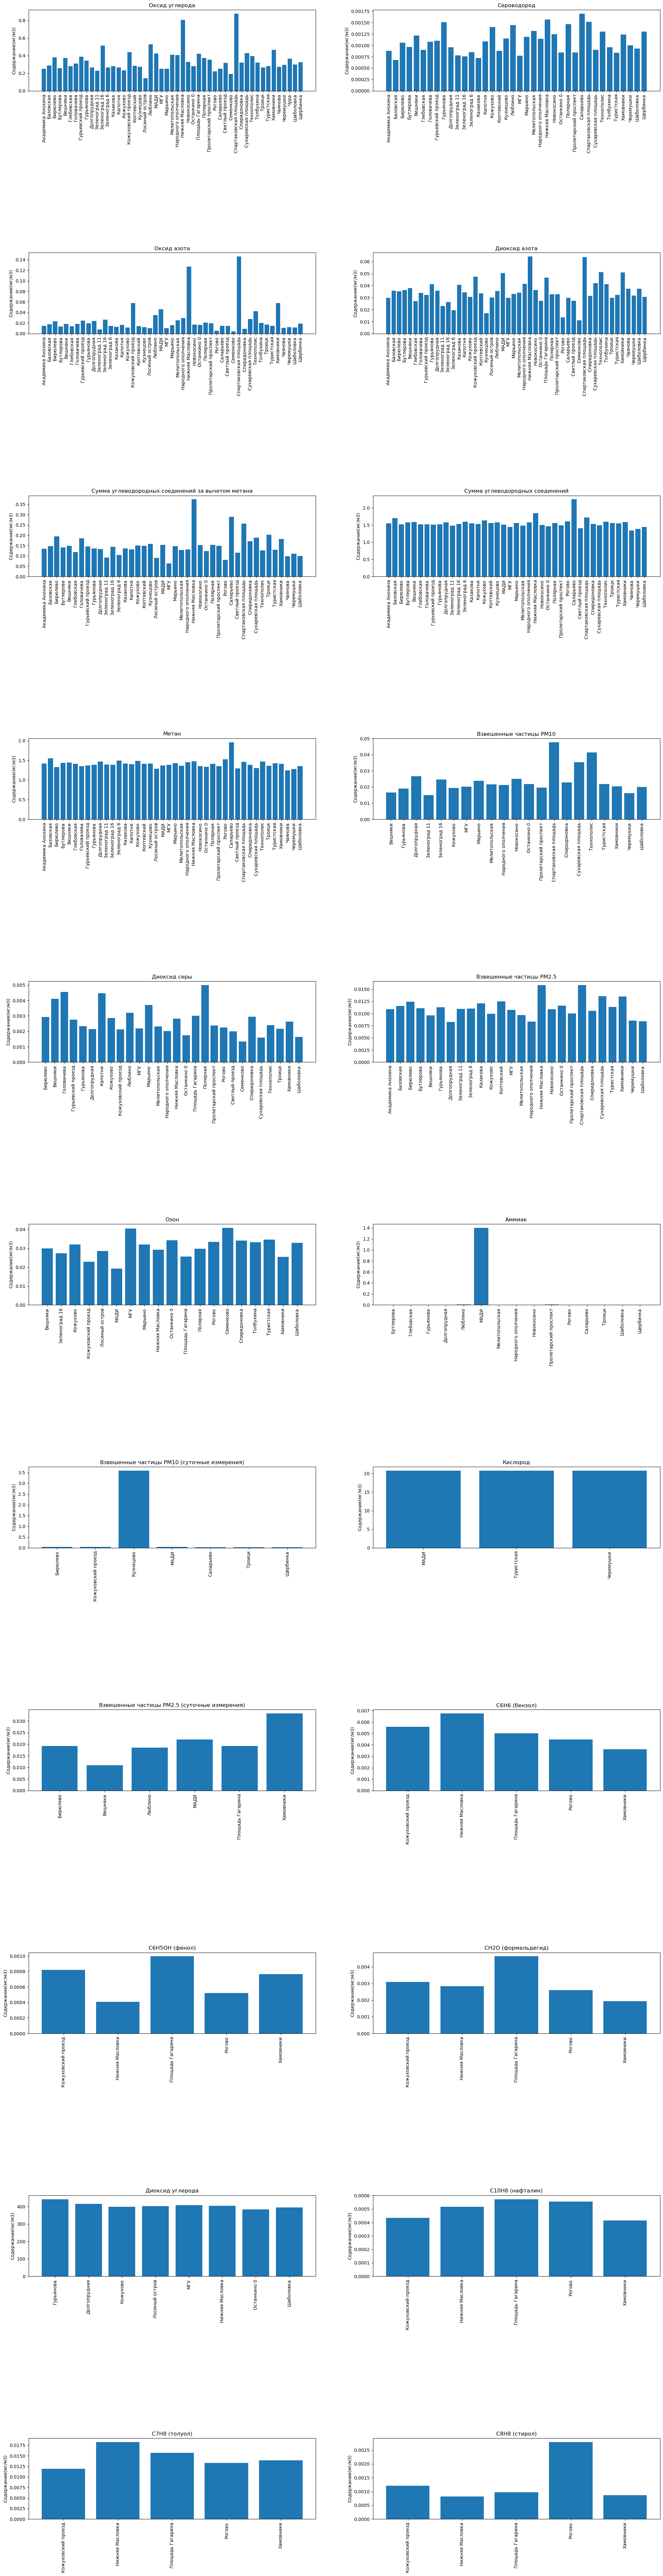

In [156]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(11, 2, figsize=(25,100))

cur_index = 0

for row in range(11):
    for column in range(2):
        district_mean = df[df['Parameter']==df['Parameter'].unique()[cur_index]].groupby('StationName').mean('MonthlyAverage')
        ax[row, column].bar(district_mean.index, district_mean['MonthlyAverage'])
        ax[row, column].set_title(df['Parameter'].unique()[cur_index])
        ax[row, column].set_xticklabels(district_mean.index, rotation=90)
        ax[row, column].set_ylabel('Содержание(мг/м3)')
        cur_index += 1

plt.subplots_adjust(hspace=2)
plt.show()

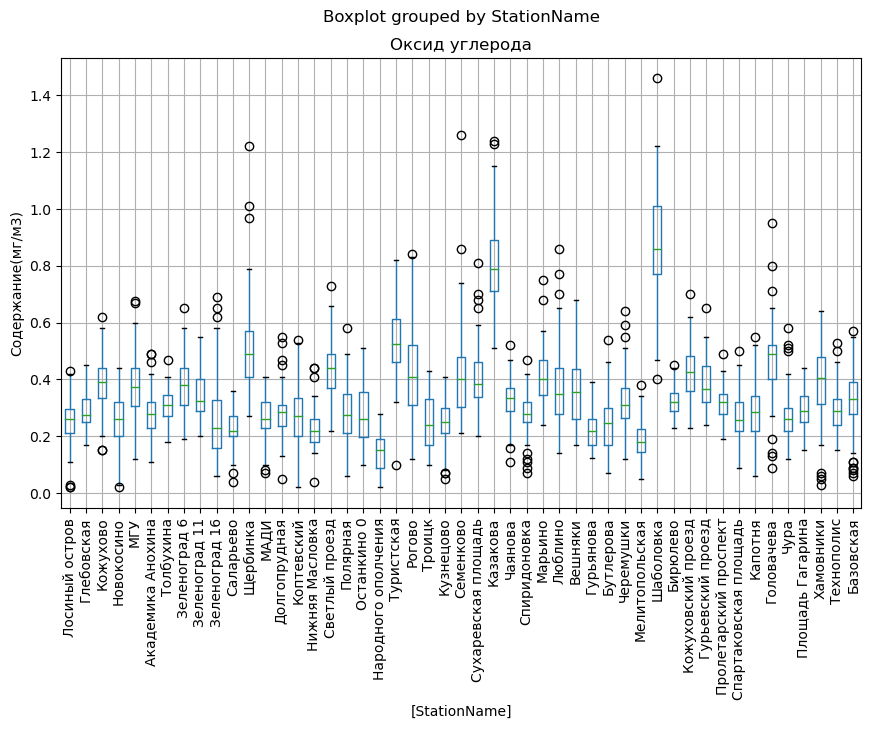

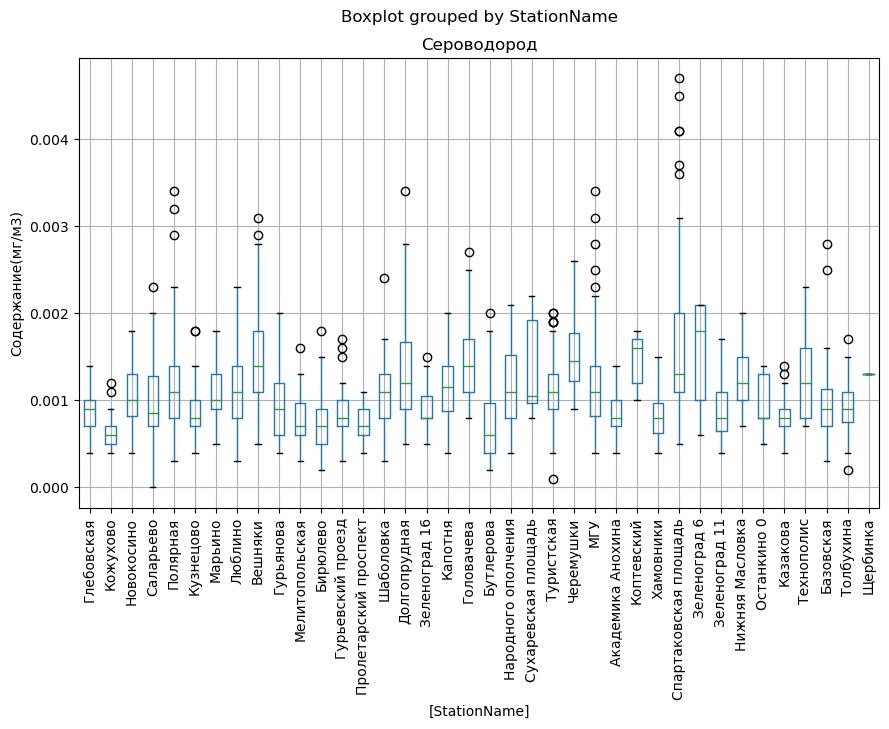

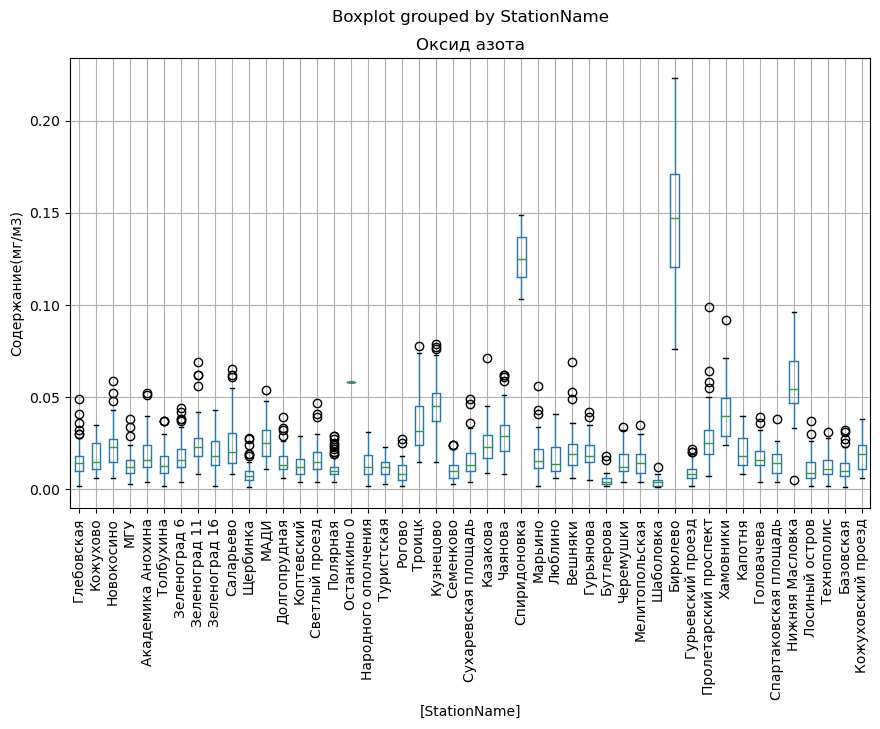

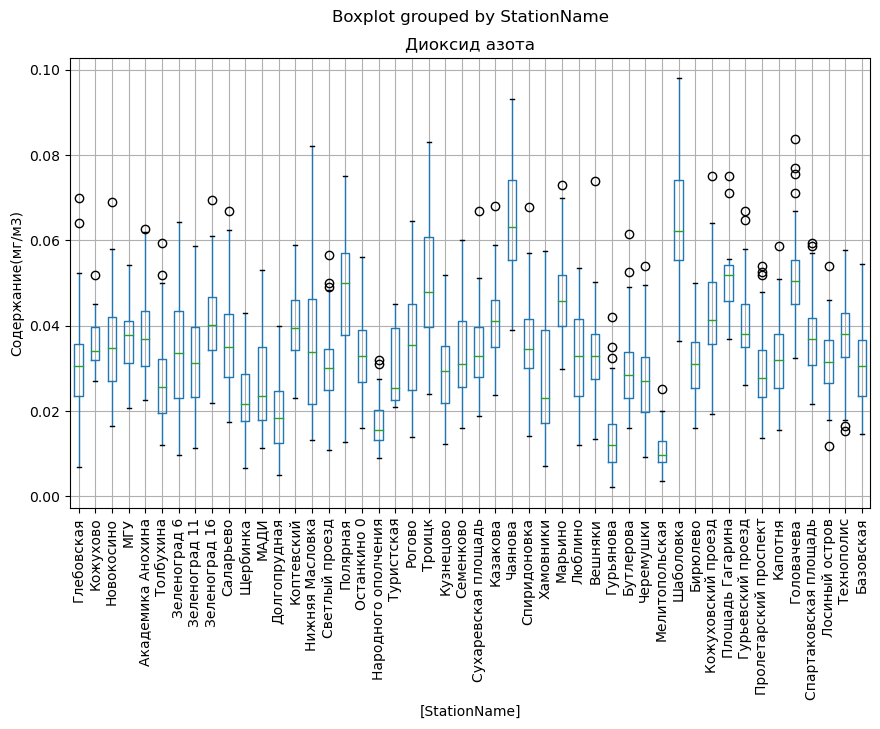

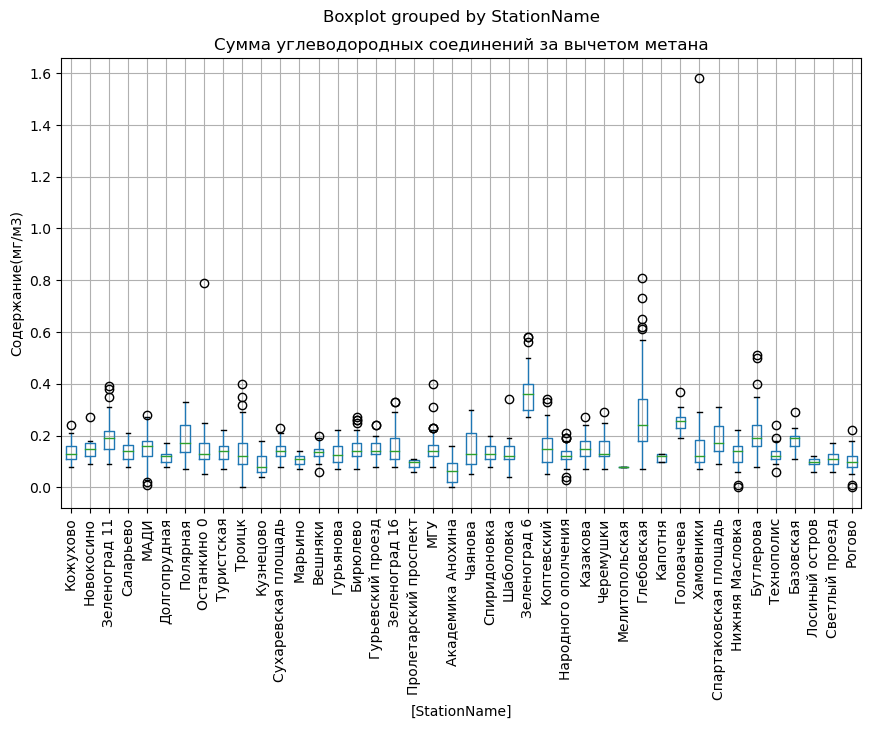

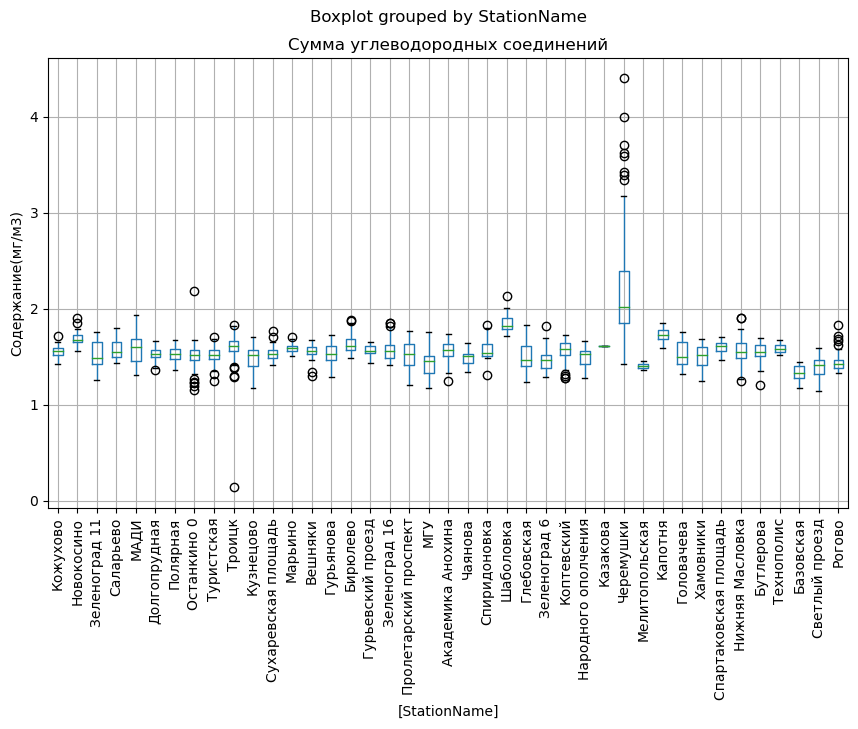

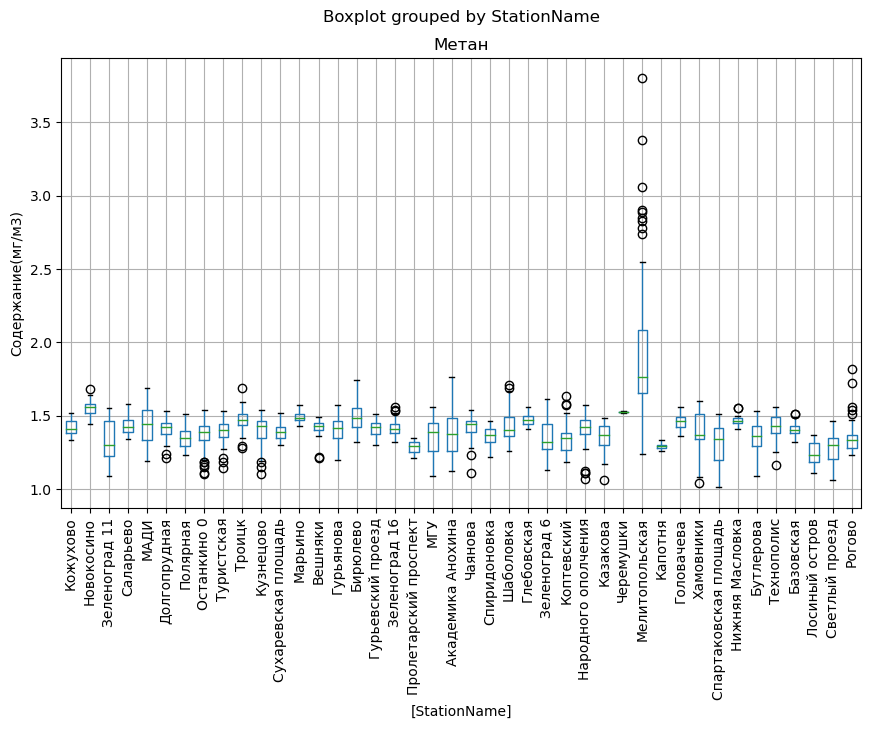

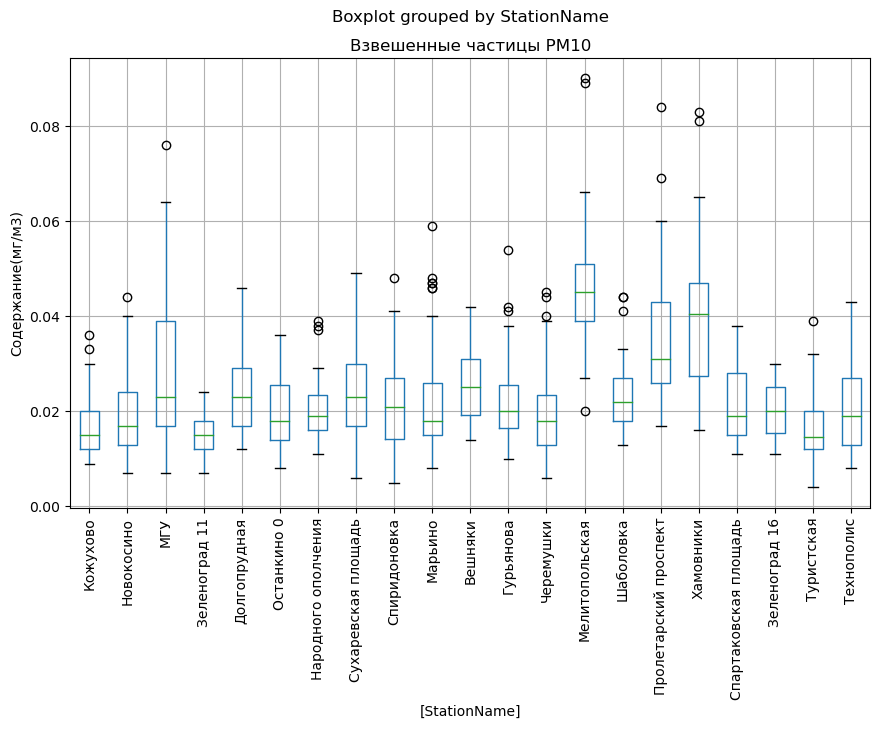

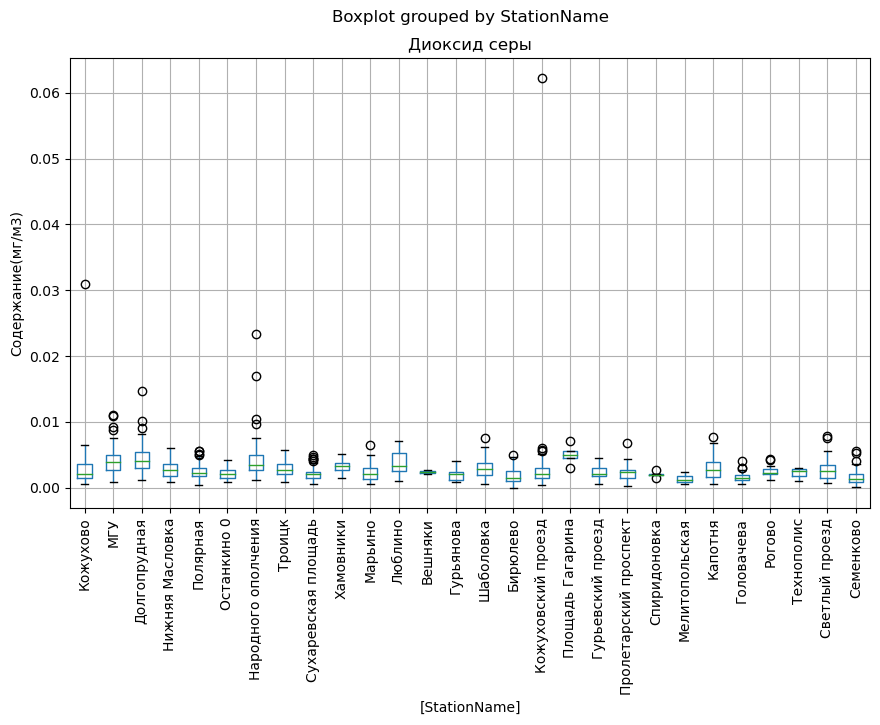

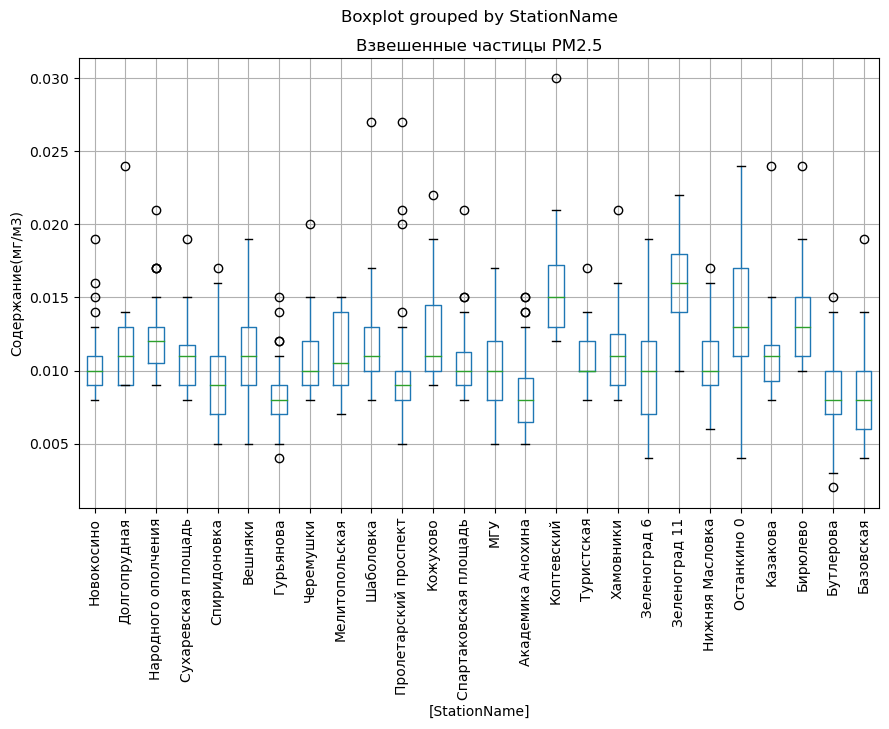

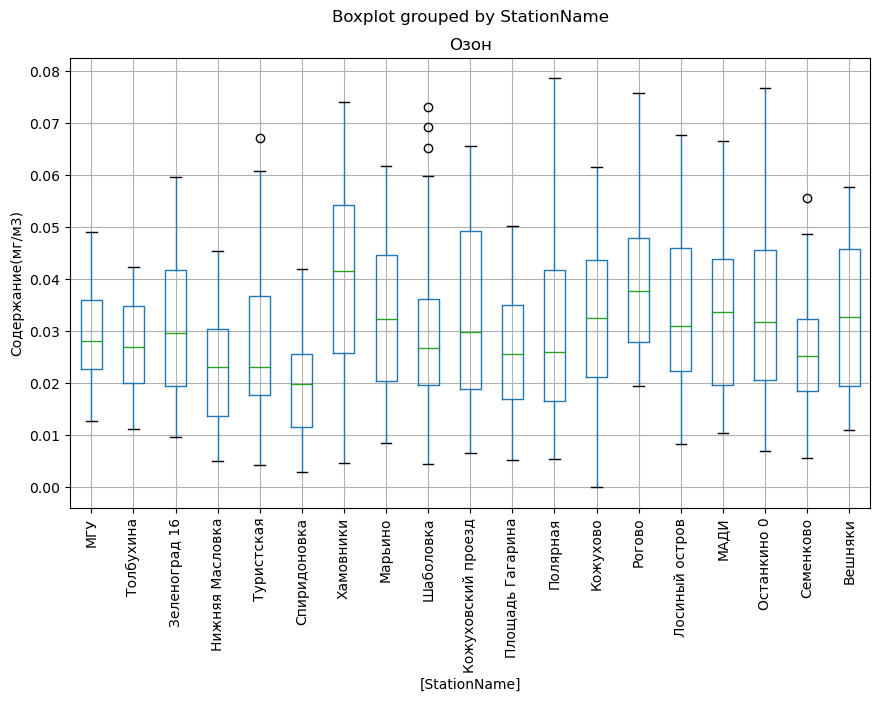

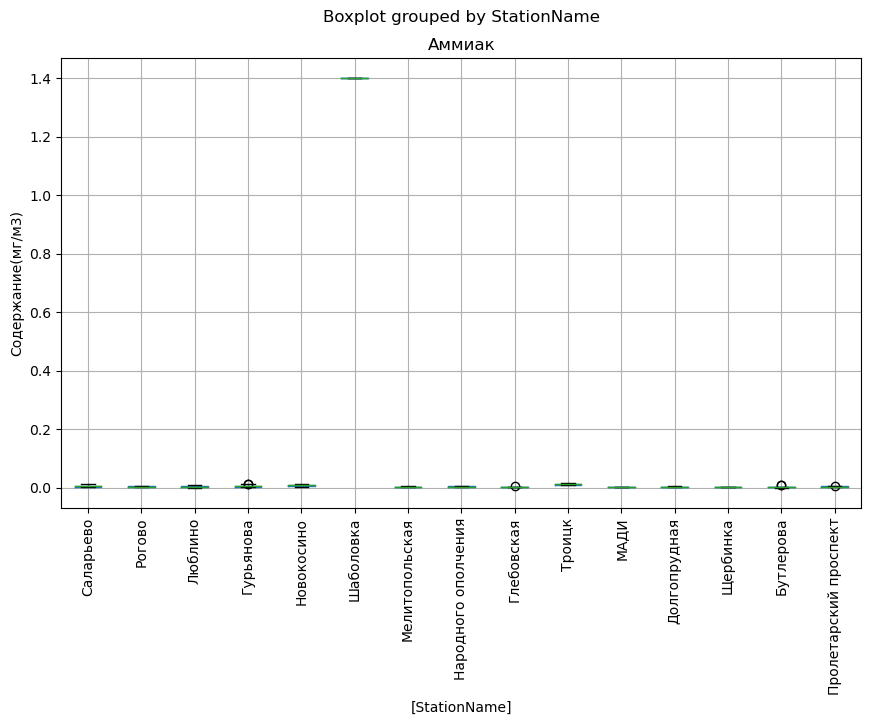

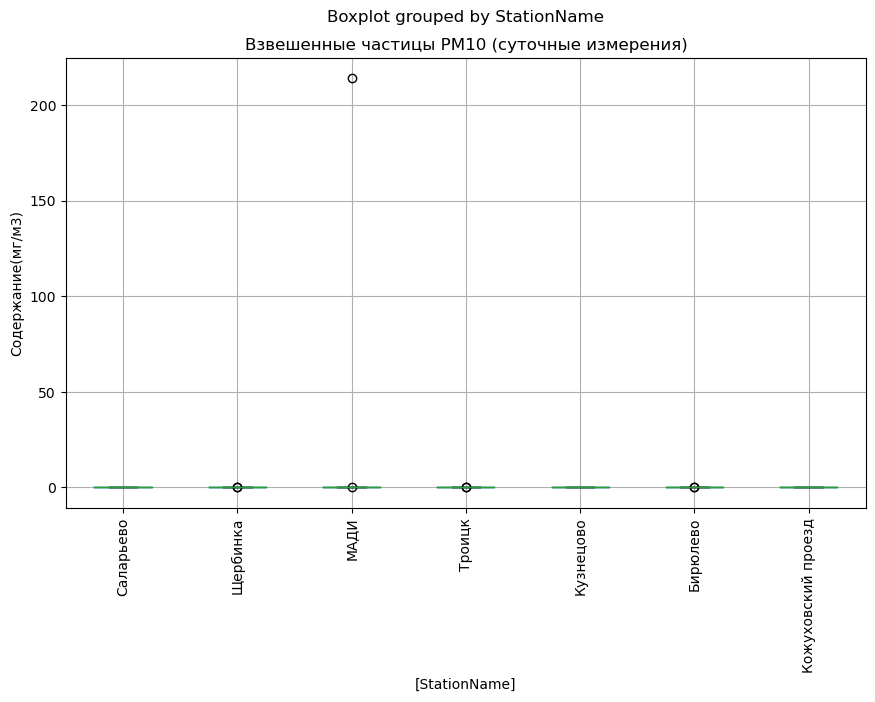

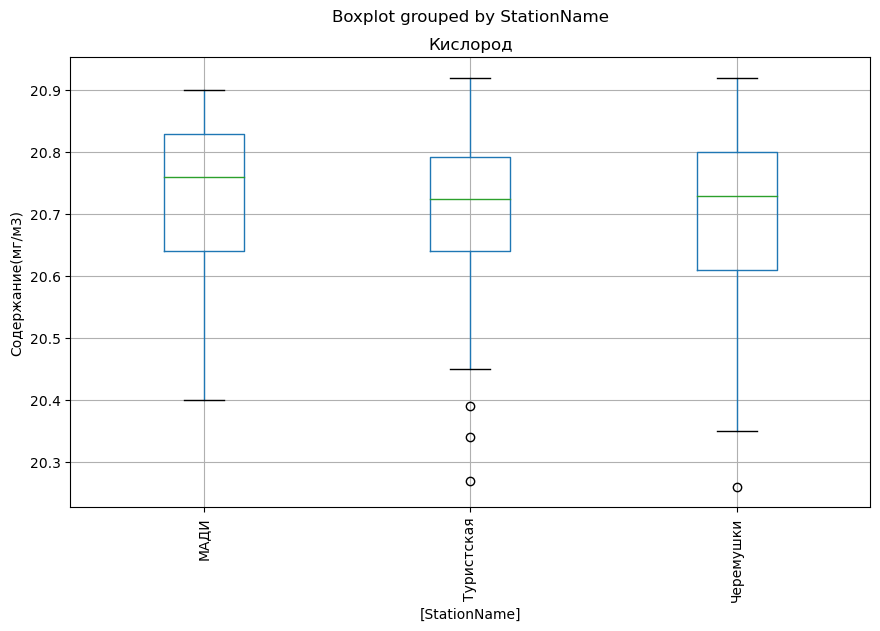

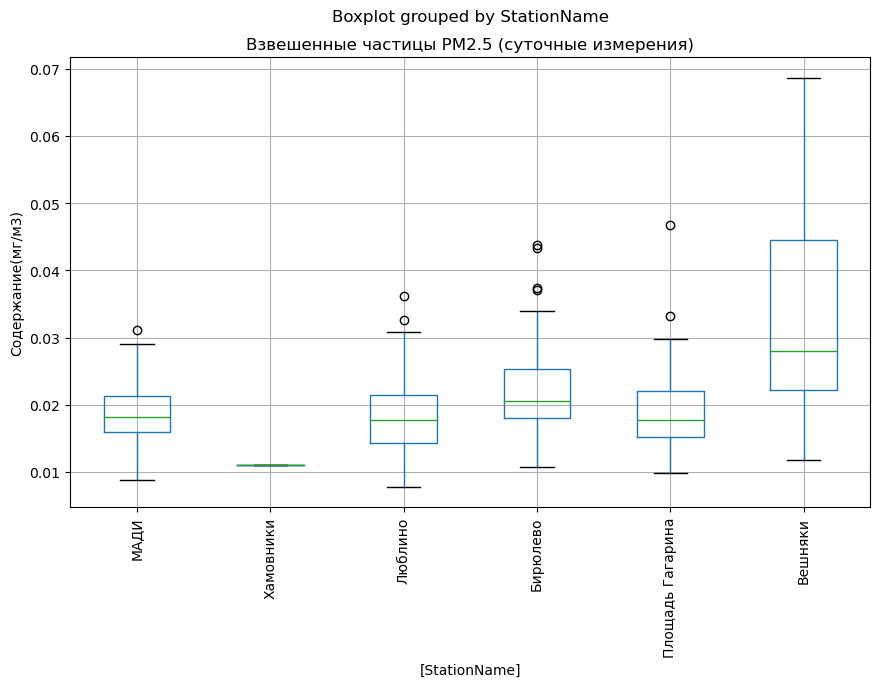

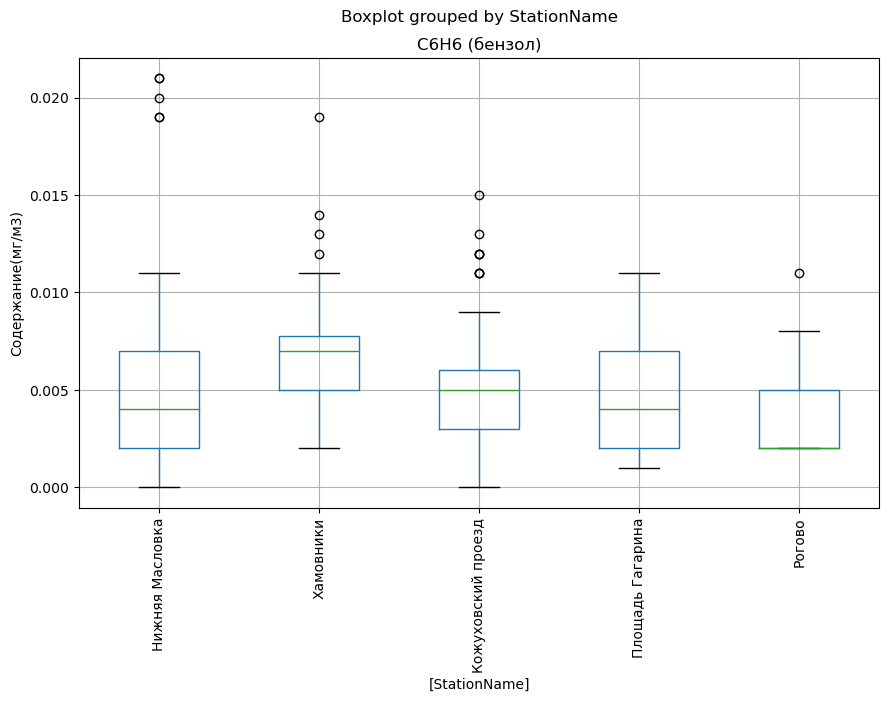

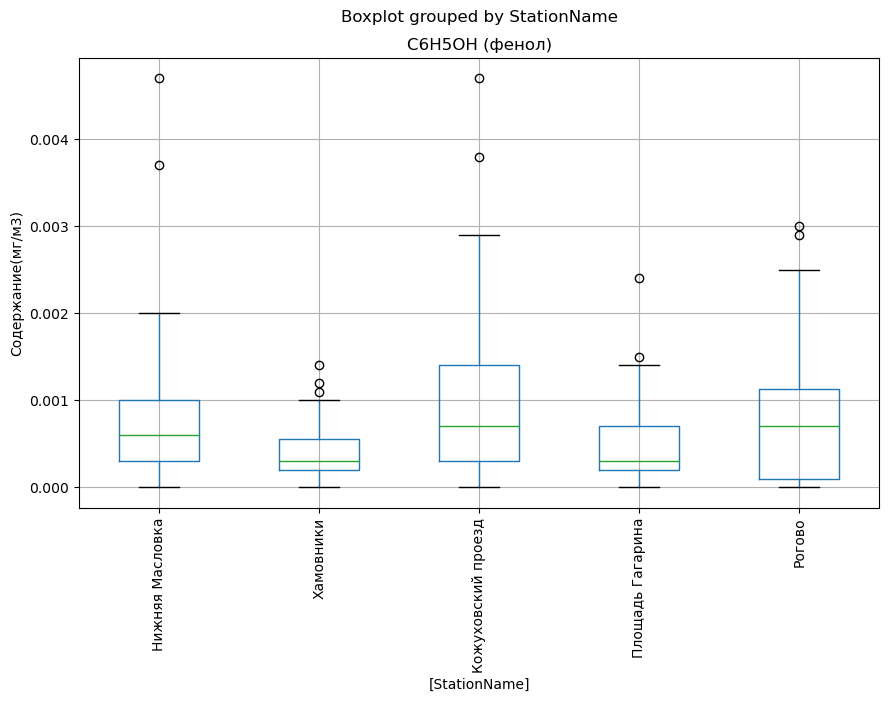

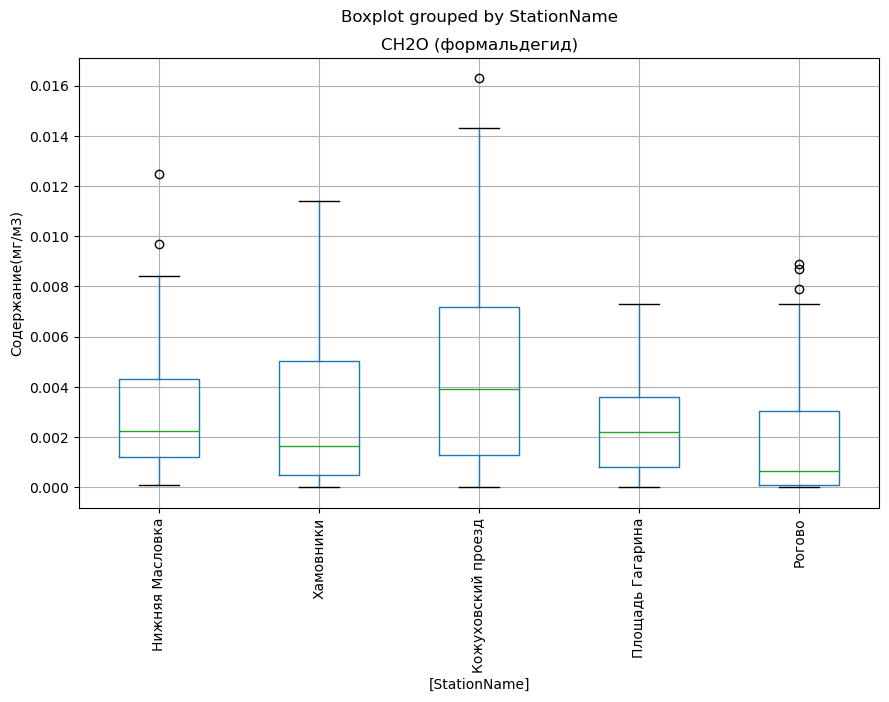

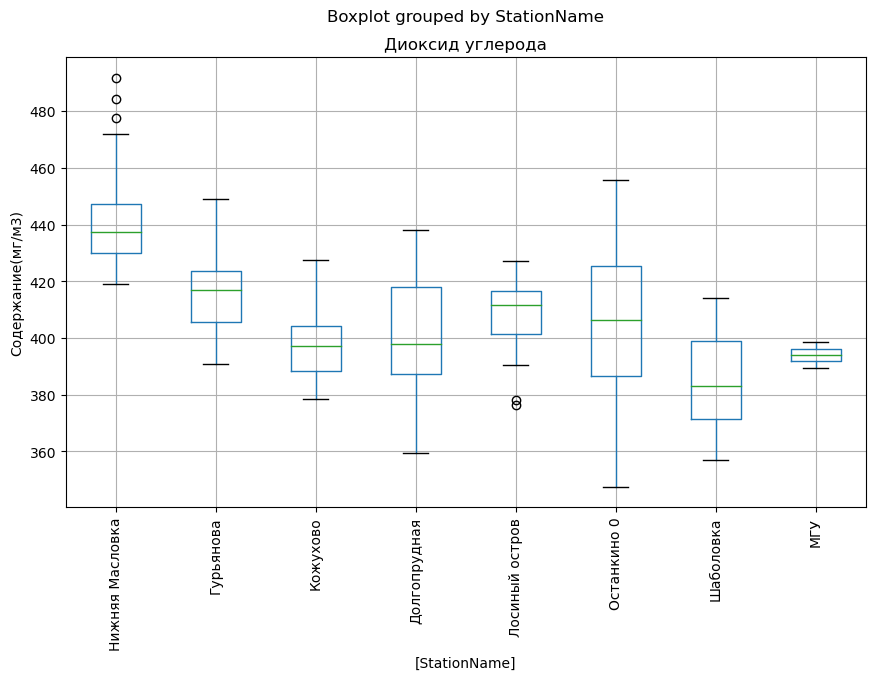

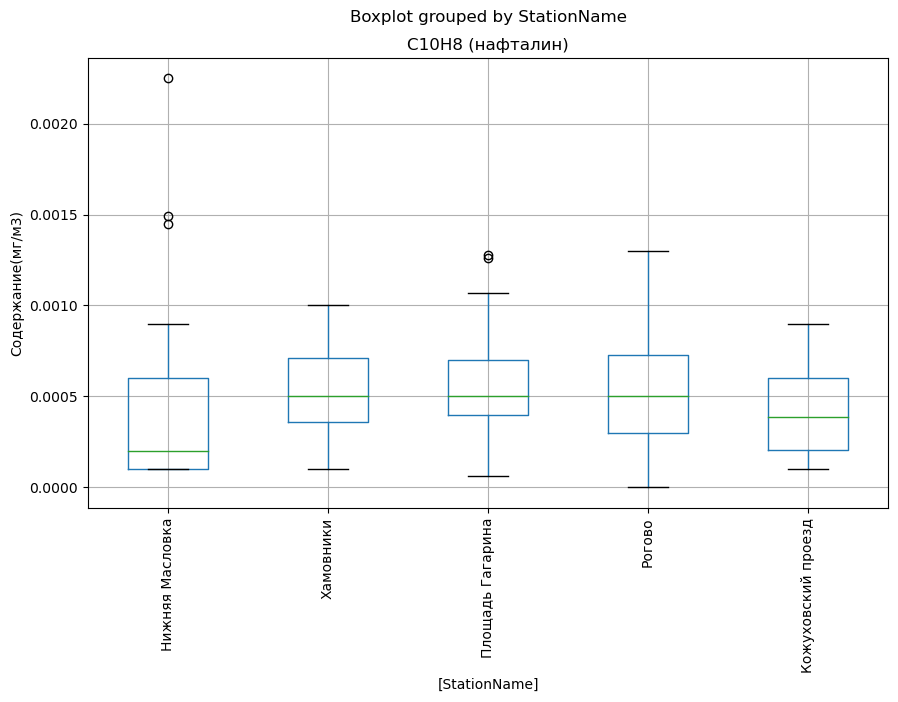

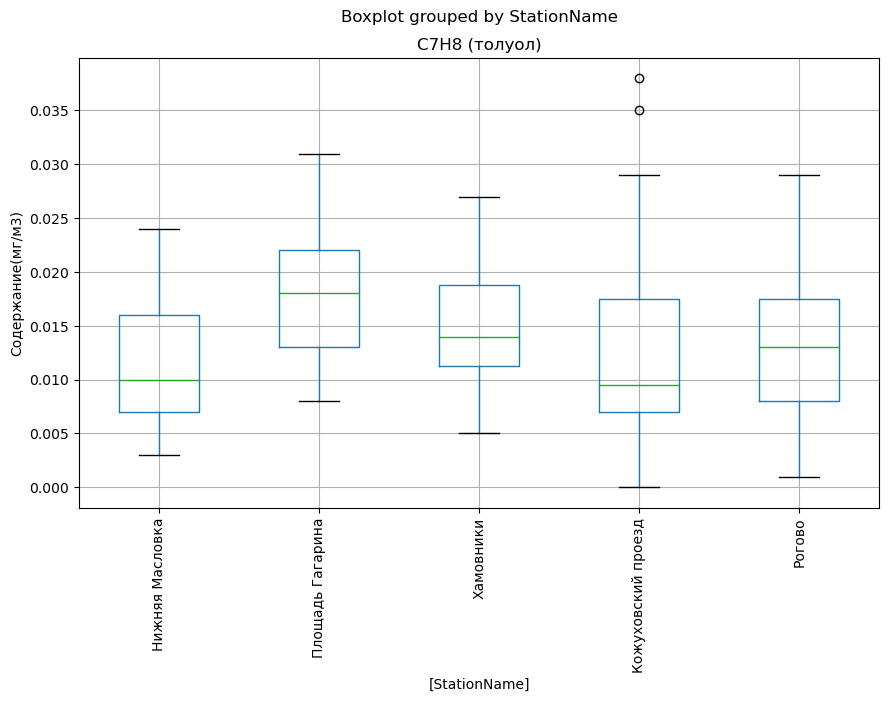

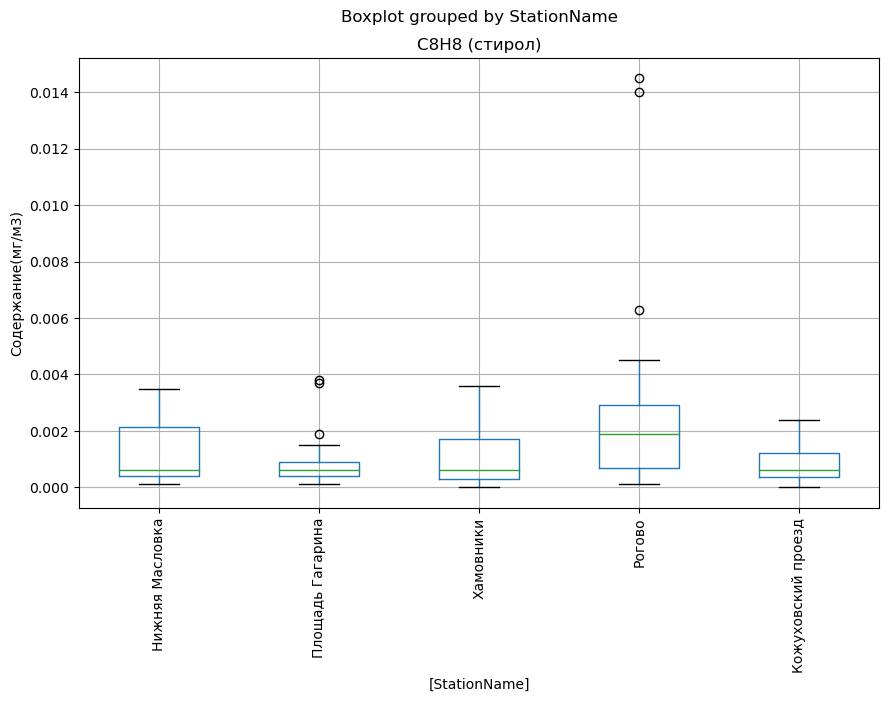

In [157]:
cur_index = 0

while (cur_index < 22):
    district_data = df[df['Parameter']==df['Parameter'].unique()[cur_index]][['StationName', 'MonthlyAverage']]
    ax = district_data.boxplot(by='StationName', figsize=(10,6))
    ax.set_title(df['Parameter'].unique()[cur_index])
    ax.set_xticklabels(district_data['StationName'].unique(),rotation=90)
    ax.set_ylabel('Содержание(мг/м3)')
    cur_index += 1

In [107]:
df[df['Parameter']==df['Parameter'].unique()[0]][['StationName', 'MonthlyAverage']]

,District,MonthlyAverage
1,район Метрогородок,0.19
2,район Богородское,0.32
9,район Косино-Ухтомский,0.22
18,район Новокосино,0.34
24,район Раменки,0.29
...,...,...
24764,район Бирюлёво Западное,0.27
24771,Даниловский район,0.44
24782,Донской район,0.39
24795,район Орехово-Борисово Южное,0.27


In [5]:
from fedot.api.main import Fedot
from fedot.core.data.data import InputData
from fedot.core.data.data_split import train_test_data_setup
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

# разбиение данных на train и test выборки
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# init model for the time-series forecasting
model_full = Fedot(problem='regression')

best_pipeline = model_full.fit(features=train, target='MonthlyAverage')
best_pipeline.print_structure()

2023-05-24 13:30:15,616 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 193.9 MiB, max: 326.5 MiB
2023-05-24 13:30:15,644 - ApiComposer - Initial pipeline was fitted in 44.4 sec.
2023-05-24 13:30:15,644 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-05-24 13:30:15,667 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 5.0 min. Set of candidate models: ['linear', 'ransac_lin_reg', 'ridge', 'knnreg', 'rfr', 'normalization', 'ransac_non_lin_reg', 'adareg', 'sgdr', 'scaling', 'dtreg', 'pca', 'lasso', 'linear', 'ransac_lin_reg', 'ridge', 'knnreg', 'rfr', 'normalization', 'ransac_non_lin_reg', 'adareg', 'sgdr', 'scaling', 'dtreg', 'pca', 'lasso'].
2023-05-24 13:30:15,679 - ApiComposer - Timeout is too small for composing and is skipped because fit_time is 44.400016 sec.
2023-05-24 13:30:15,692 - ApiComposer - Hyperparameters tuning started with 4 min. timeou

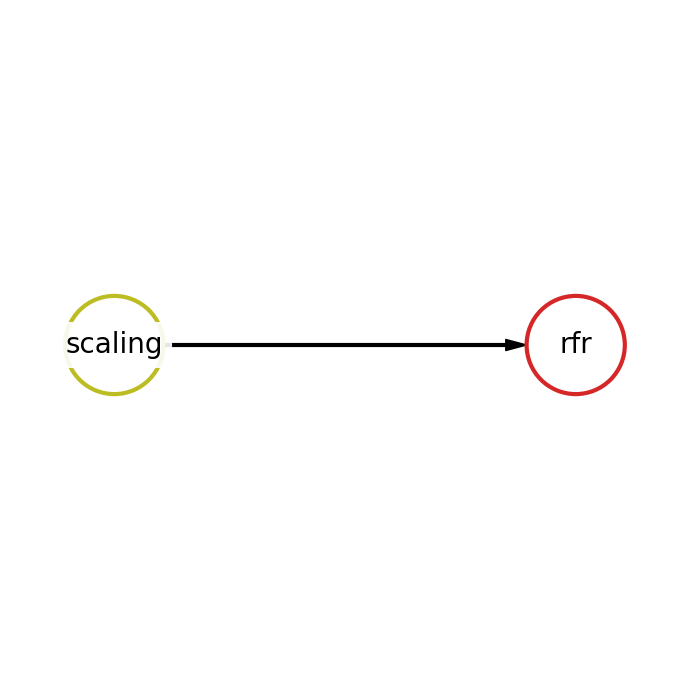

In [6]:
best_pipeline.show()

In [7]:
prediction = model_full.predict(features=test)
prediction = model_full.get_metrics()

In [8]:
prediction

{'rmse': 2.151, 'mae': 0.25}

In [47]:
df['MonthlyAverage'].mean()

5.318437058420352